In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import dask.dataframe as dd

In [2]:
from pathlib import Path

AVES_ROOT = Path("../../..")
DATA_PATH = Path("../../../data/external/adatrap_sample/")

In [3]:
zones = gpd.read_file(
    DATA_PATH / "Zonas777-04-04-2014" / "Shape" / "Zonas777_V07_04_2014.shp"
)
# en ADATRAP están con tipo str
zones = zones.assign(ZONA777=lambda x: x["ZONA777"].astype(str))
zones.head()

,ID,AREA,ZONA777,Z_EOD,N_COM,COMUNA,NMACROZONA,MACROZONA,N_ZONATS,ZONA_TS,EVTOTAL201,EVPMA2012,EVPTA2012,NETAPAS201,TIEMPOVIAJ,VELOCIDADV,geometry
0,902,311.50,56,56,31,RENCA,1,NORTE,1,B,0.4511,NaN,NaN,2.67,1.18,4.78,"POLYGON ((-70.75950 -33.41237, -70.76014 -33.4..."
1,900,702.75,837,56,31,RENCA,1,NORTE,1,B,0.4115,NaN,NaN,2.09,2.25,9.60,"POLYGON ((-70.73929 -33.38999, -70.73667 -33.3..."
2,584,558.50,625,494,33,PUENTE ALTO,6,SURORIENTE,6,F,0.2441,NaN,NaN,2.00,2.28,2.47,"POLYGON ((-70.54357 -33.54802, -70.54293 -33.5..."
3,437,325.25,478,478,14,LA FLORIDA,6,SURORIENTE,6,E,0.2500,NaN,NaN,2.00,1.55,0.77,"POLYGON ((-70.54357 -33.54802, -70.54519 -33.5..."
4,770,643.50,806,915,26,MAIPU,2,PONIENTE,2,I,0.1050,NaN,NaN,2.03,7.92,5.35,"POLYGON ((-70.78731 -33.56483, -70.79797 -33.5..."


<Axes: >

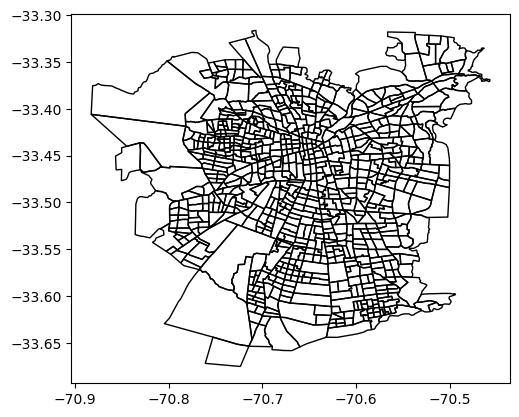

In [4]:
zones.plot(facecolor="none", edgecolor="black")

In [5]:
def convert_date(date, overwrite=False):
    if not (DATA_PATH / f"{date}.parquet").exists() or overwrite:
        csv = dd.read_csv(
            DATA_PATH / f"{date}",
            sep="|",
            dtype={
                "diseno777bajada": "object",
                "diseno777subida": "object",
                "dviajeeuclidiana_mts": "object",
                "tviaje_min": "object",
                "tviaje_seg": "object",
                "zona777subida_1era": "object",
            },
            parse_dates=["tiemposubida"],
        )

        csv.to_parquet(DATA_PATH / f"{date}.parquet")


def read_date(date):
    if not (DATA_PATH / f"{date}.parquet").exists():
        convert_date(date)
    return dd.read_parquet(DATA_PATH / f"{date}.parquet")

In [6]:
# convert_date('2018-05-14', overwrite=True)
# convert_date('2019-05-13', overwrite=True)

In [7]:
df_before = read_date("2018-05-14")
df_before.head()

,id,nviaje,netapa,etapas,netapassinbajada,ultimaetapaconbajada,tviaje_seg,tviaje_min,dviajeeuclidiana_mts,dviajeenruta_mts,...,tipotransporte_4ta,tesperaest_1era,tesperaest_2da,tesperaest_3era,tesperaest_4ta,escolar,tviaje_en_vehiculo_min,tipo_corte_etapa_viaje,proposito,dviaje_buses
0,763932,1,2,-,0,1,2743.0000,45.7167,15503.5537,18411.0000,...,-,-,-,-,-,-,42.2333,SM2H,TRABAJO,-
1,763932,2,2,-,0,1,2659.0000,44.3167,15839.9541,19203.0000,...,-,-,-,-,-,-,42.0000,UE,HOGAR,-
2,797868,1,2,-,0,1,2128.0000,35.4667,16807.7402,2712.0000,...,-,-,-,-,-,-,26.4333,SM2H,OTROS,-
3,797868,2,1,-,0,1,3934.0000,65.5667,17262.1328,18443.0000,...,-,-,-,-,-,-,65.5667,UE,HOGAR,-
4,1106090,1,1,-,0,1,653.0000,10.8833,4338.0581,4379.0000,...,-,-,-,-,-,-,10.8833,SM2H,TRABAJO,-


In [8]:
len(df_before.columns)

109

In [9]:
df_after = read_date("2019-05-13")
df_after.head()

,id,nviaje,netapa,etapas,netapassinbajada,ultimaetapaconbajada,tviaje_seg,tviaje_min,dviajeeuclidiana_mts,dviajeenruta_mts,...,tipotransporte_4ta,tesperaest_1era,tesperaest_2da,tesperaest_3era,tesperaest_4ta,escolar,tviaje_en_vehiculo_min,tipo_corte_etapa_viaje,proposito,dviaje_buses
0,763932,1,2,-,0,1,2665.0000,44.4167,15503.0850,18426.0000,...,-,-,-,-,-,-,41.2833,SM2H,TRABAJO,-
1,763932,2,2,-,0,1,2900.0000,48.3333,15842.5420,19193.0000,...,-,-,-,-,-,-,40.5833,UE,HOGAR,-
2,1109562,1,2,-,0,1,3029.0000,50.4833,16403.5918,22797.0000,...,-,-,-,-,-,-,49.5667,SM2H,TRABAJO,-
3,1109562,2,1,-,0,1,2457.0000,40.9500,16126.8535,20131.0000,...,-,-,-,-,-,-,40.9500,M3B,OTROS,-
4,1109562,3,1,-,0,1,651.0000,10.8500,2600.2378,2828.0000,...,-,-,-,-,-,-,10.8500,UE,HOGAR,-


<Axes: ylabel='Frequency'>

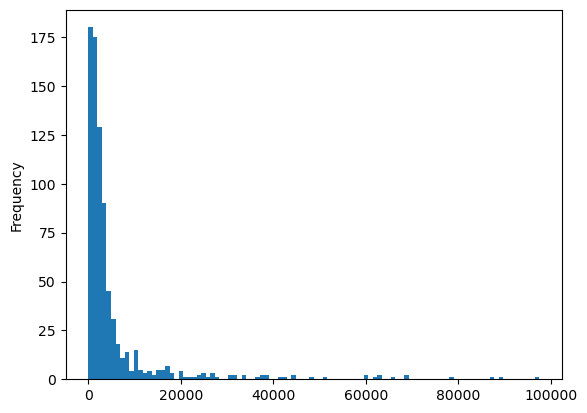

In [10]:
subidas_por_zona_1 = (
    df_before.groupby("diseno777subida")["factorexpansion"]
    .sum()
    .rename("n_subidas")
    .compute()
)
subidas_por_zona_1.plot(kind="hist", bins=100)

<Axes: ylabel='Frequency'>

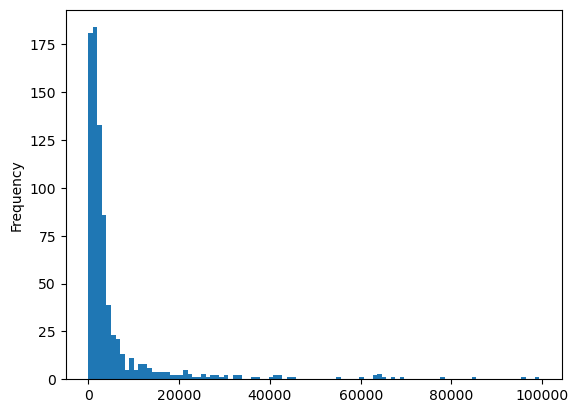

In [11]:
subidas_por_zona_2 = (
    df_after.groupby("diseno777subida")["factorexpansion"]
    .sum()
    .rename("n_subidas")
    .compute()
)
subidas_por_zona_2.plot(kind="hist", bins=100)

Text(0.5, 1.0, 'Después')

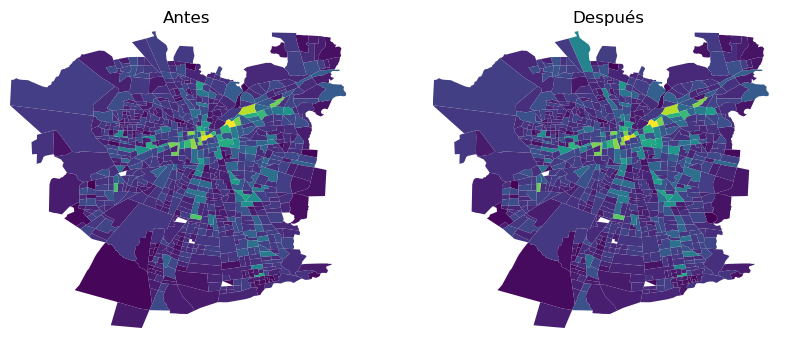

In [12]:
from aves.visualization.figures import small_multiples_from_geodataframe

fig, axes = small_multiples_from_geodataframe(zones, 2)

zones.join(np.sqrt(subidas_por_zona_1), on="ZONA777").plot(
    column="n_subidas", ax=axes[0]
)
axes[0].set_title("Antes")

zones.join(np.sqrt(subidas_por_zona_2), on="ZONA777").plot(
    column="n_subidas", ax=axes[1]
)
axes[1].set_title("Después")

<Axes: ylabel='Frequency'>

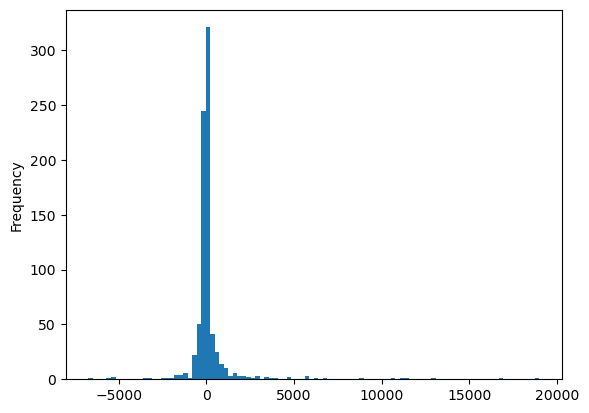

In [13]:
subidas_por_zona_2.sub(subidas_por_zona_1).drop("-").rename("delta_viajes").plot(
    kind="hist", bins=100
)

(<Axes: >,
 <AxesHostAxes: title={'left': 'Diferencia Viajes T.P. (2019 - 2018)'}>)

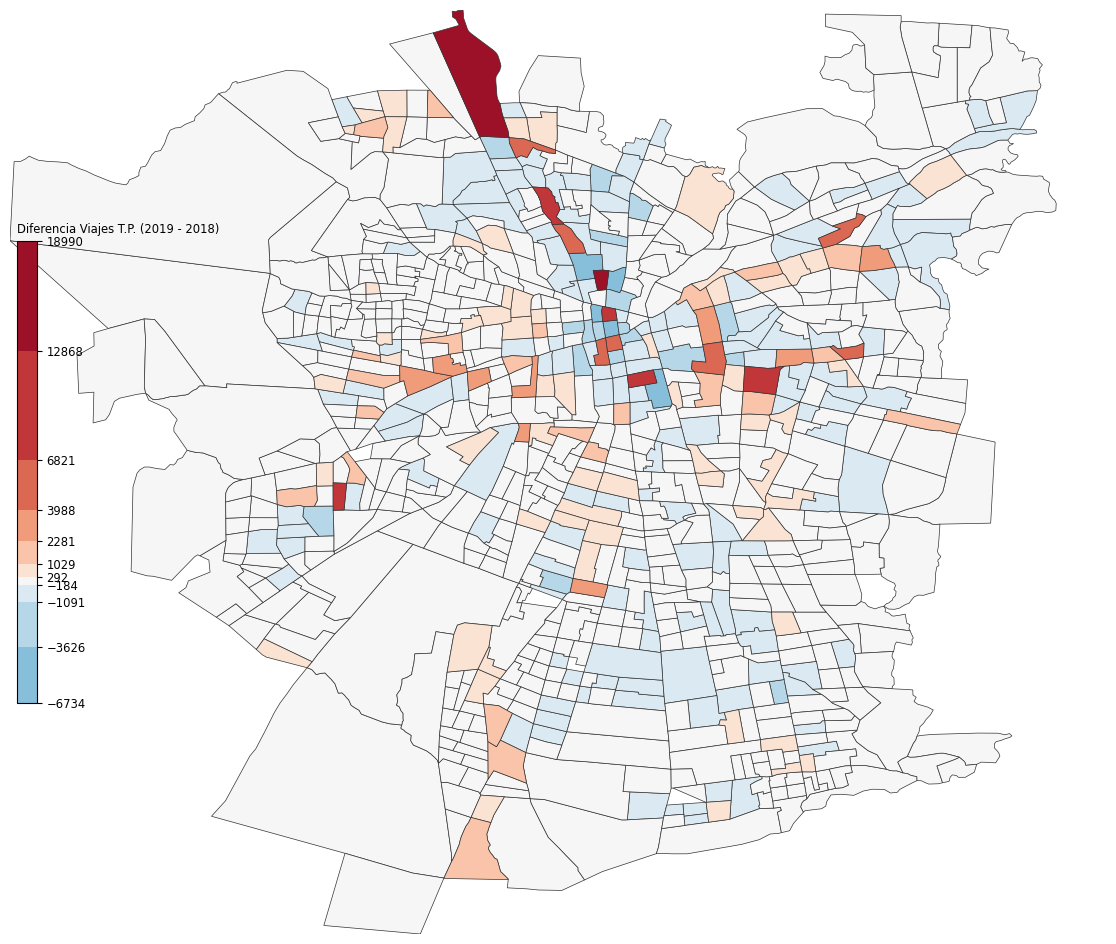

In [14]:
from aves.visualization.maps import choropleth_map

fig, ax = small_multiples_from_geodataframe(zones, 1, height=12)

choropleth_map(
    ax,
    zones.join(
        subidas_por_zona_2.sub(subidas_por_zona_1).rename("delta_viajes"), on="ZONA777"
    ),
    "delta_viajes",
    k=10,
    binning="fisher_jenks",
    linewidth=0.5,
    edgecolor="#333333",
    cbar_args=dict(
        label="Diferencia Viajes T.P. (2019 - 2018)",
        height="50%",
        width="2%",
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
    ),
)

In [15]:
from aves.features.utils import normalize_rows

<Axes: xlabel='comunabajada', ylabel='comunasubida'>

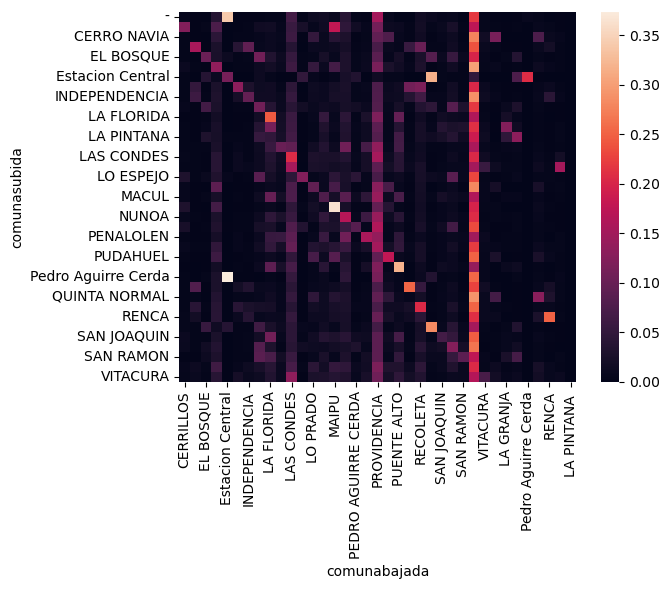

In [16]:
sns.heatmap(
    df_before[df_before["comunabajada"] != "-"]
    .groupby(["comunasubida", "comunabajada"])["factorexpansion"]
    .sum()
    .compute()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)

In [17]:
trip_counts_1 = (
    df_before.assign(hour=lambda x: x["tiemposubida"].dt.hour)
    .groupby(["hour", "diseno777subida", "comunasubida"])["factorexpansion"]
    .sum()
    .rename("n_viajes")
    .reset_index()
    .assign(tiempo=0)
    .compute()
)
trip_counts_1

,hour,diseno777subida,comunasubida,n_viajes,tiempo
0,0,116,LO PRADO,2.1399,0
1,0,119,LO PRADO,3.2097,0
2,0,174,PROVIDENCIA,4.2798,0
3,0,183,PROVIDENCIA,7.4896,0
4,0,206,LAS CONDES,53.4960,0
...,...,...,...,...,...
18739,18,596,MAIPU,0.0000,0
18740,21,124,ESTACION CENTRAL,0.0000,0
18741,22,147,QUINTA NORMAL,0.0000,0
18742,22,516,PUENTE ALTO,0.0000,0


In [18]:
trip_counts_2 = (
    df_after.assign(hour=lambda x: x["tiemposubida"].dt.hour)
    .groupby(["hour", "diseno777subida", "comunasubida"])["factorexpansion"]
    .sum()
    .rename("n_viajes")
    .reset_index()
    .assign(tiempo=1)
    .compute()
)
trip_counts_2

,hour,diseno777subida,comunasubida,n_viajes,tiempo
0,0,123,LO PRADO,28.5680,1
1,0,160,MAIPU,6.3482,1
2,0,163,MAIPU,0.0000,1
3,0,176,PROVIDENCIA,91.5399,1
4,0,179,PROVIDENCIA,12.6968,1
...,...,...,...,...,...
18848,21,104,ESTACION CENTRAL,0.0000,1
18849,21,548,LA FLORI,1.6004,1
18850,22,139,RENCA,2.1437,1
18851,23,14,CONCHALI,0.0000,1


In [19]:
zones = zones.set_crs("epsg:4326")

In [20]:
scooter_trips = gpd.read_file(
    AVES_ROOT / "data/external/scooters/cleaned_trips.geo.json"
)
scooter_trips["departure_time"] = pd.to_datetime(
    scooter_trips["departure_time"], format="mixed", dayfirst=False
)
scooter_trips

,vehicle_id,delta_dist,distance_covered,average_speed,travel_time_minutes,departure_period,coverage_period,weekday,departure_time,hour,origin_zone,destination_zone,geometry
0,15,1.290820,1.290820,7.899219,10,afternoon_peak,3,6,2019-03-17 19:44:09.196000,19.733333,498,287,"LINESTRING (-70.60534 -33.41777, -70.60534 -33..."
1,15,0.493173,0.493173,7.364598,4,night_valley,3,6,2019-03-17 22:23:12.682000,22.383333,287,287,"LINESTRING (-70.59461 -33.41437, -70.59434 -33..."
2,15,0.840526,0.840526,12.514721,4,night_2,3,1,2019-03-19 02:41:18.520000,2.683333,287,288,"LINESTRING (-70.59644 -33.41457, -70.59645 -33..."
3,15,1.793798,1.793798,11.246580,10,afternoon_peak,3,2,2019-03-20 17:40:19.051001,17.666667,288,287,"LINESTRING (-70.58935 -33.41622, -70.58935 -33..."
4,15,0.284918,0.284918,6.576009,3,afternoon_valley,3,3,2019-03-21 13:30:50.382000,13.500000,498,498,"LINESTRING (-70.60527 -33.41705, -70.60536 -33..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45013,711,0.956066,0.956066,11.025179,5,night_valley,3,5,2019-01-26 20:32:44.212002,20.533333,321,300,"LINESTRING (-70.56879 -33.40372, -70.56817 -33..."
45014,711,2.798844,2.798844,6.512281,26,night_1,3,5,2019-01-26 23:22:18.420000,23.366667,300,306,"LINESTRING (-70.56722 -33.39764, -70.56711 -33..."
45015,712,0.889161,0.889161,1.367119,39,afternoon_peak,3,0,2019-01-28 18:52:54.049000,18.866667,292,307,"LINESTRING (-70.57066 -33.41359, -70.57067 -33..."
45016,712,0.796317,0.796317,8.886202,5,night_valley,3,0,2019-01-28 22:21:58.387001,22.350000,307,307,"LINESTRING (-70.57739 -33.40867, -70.57750 -33..."


<Axes: xlabel='departure_time'>

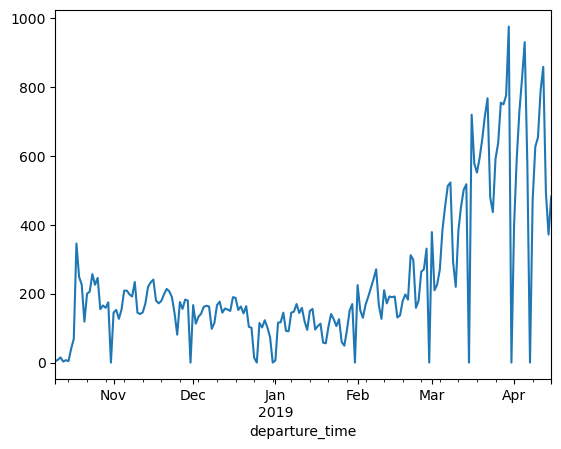

In [21]:
scooter_trips.resample("1d", on="departure_time").size().plot()

<Axes: >

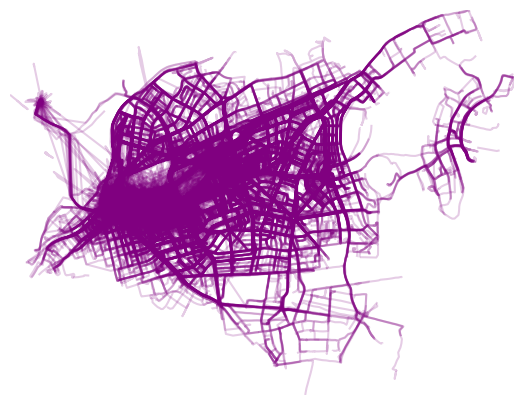

In [22]:
from aves.visualization.figures import figure_from_geodataframe

fig, ax = figure_from_geodataframe(scooter_trips)

scooter_trips.plot(alpha=0.2, color="purple", ax=ax)

<Axes: >

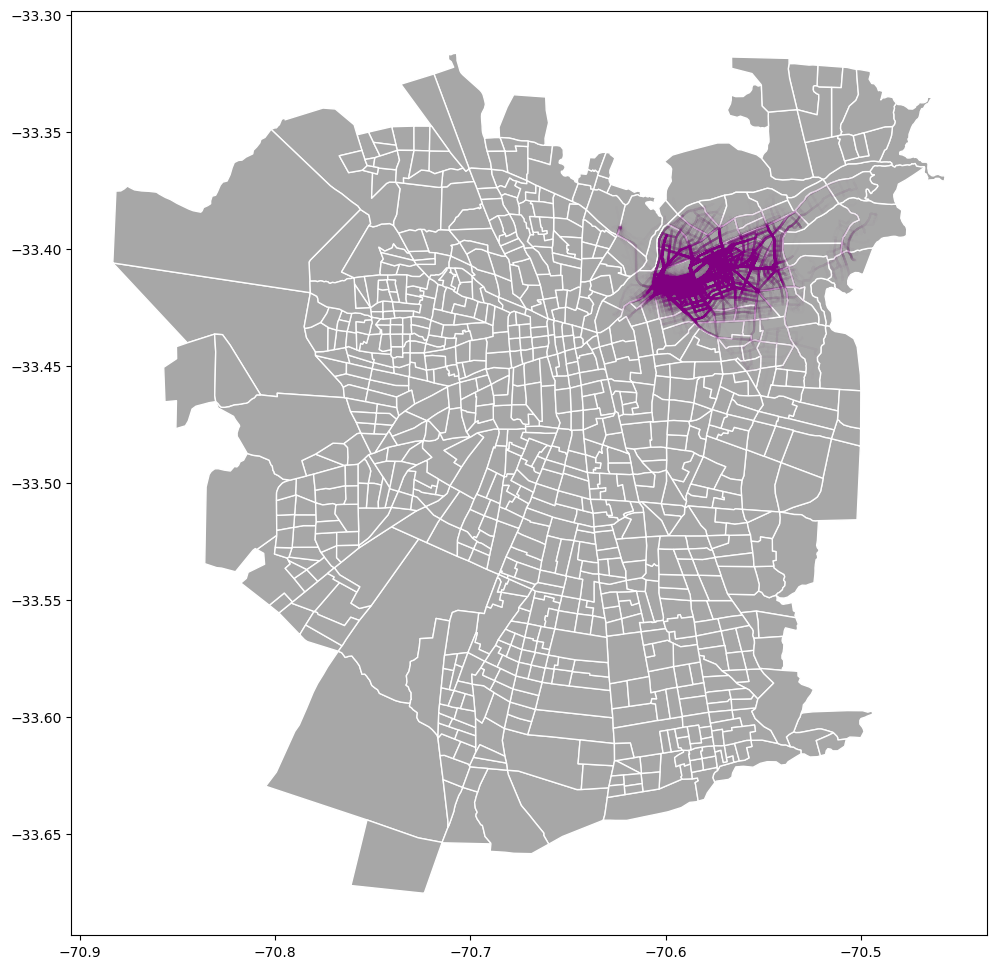

In [23]:
ax = zones.plot(facecolor="#a7a7a7", edgecolor="white", figsize=(12, 12))
scooter_trips.plot(alpha=0.01, color="purple", ax=ax)

<Axes: >

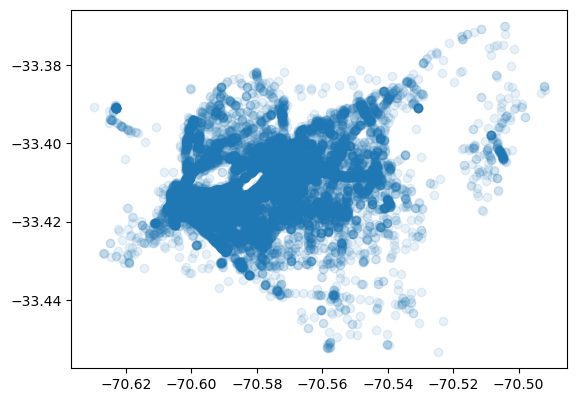

In [24]:
from shapely import get_point

scooter_trip_origins = scooter_trips.assign(
    geometry=scooter_trips.geometry.map(lambda x: get_point(x, 0))
).assign(
    hour=lambda x: x["departure_time"].dt.hour,
    dayofweek=lambda x: x["departure_time"].dt.dayofweek,
    tiempo=1,
)
scooter_trip_origins.plot(alpha=0.1)

In [25]:
scooter_trip_origins

,vehicle_id,delta_dist,distance_covered,average_speed,travel_time_minutes,departure_period,coverage_period,weekday,departure_time,hour,origin_zone,destination_zone,geometry,dayofweek,tiempo
0,15,1.290820,1.290820,7.899219,10,afternoon_peak,3,6,2019-03-17 19:44:09.196000,19,498,287,POINT (-70.60534 -33.41777),6,1
1,15,0.493173,0.493173,7.364598,4,night_valley,3,6,2019-03-17 22:23:12.682000,22,287,287,POINT (-70.59461 -33.41437),6,1
2,15,0.840526,0.840526,12.514721,4,night_2,3,1,2019-03-19 02:41:18.520000,2,287,288,POINT (-70.59644 -33.41457),1,1
3,15,1.793798,1.793798,11.246580,10,afternoon_peak,3,2,2019-03-20 17:40:19.051001,17,288,287,POINT (-70.58935 -33.41622),2,1
4,15,0.284918,0.284918,6.576009,3,afternoon_valley,3,3,2019-03-21 13:30:50.382000,13,498,498,POINT (-70.60527 -33.41705),3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45013,711,0.956066,0.956066,11.025179,5,night_valley,3,5,2019-01-26 20:32:44.212002,20,321,300,POINT (-70.56879 -33.40372),5,1
45014,711,2.798844,2.798844,6.512281,26,night_1,3,5,2019-01-26 23:22:18.420000,23,300,306,POINT (-70.56722 -33.39764),5,1
45015,712,0.889161,0.889161,1.367119,39,afternoon_peak,3,0,2019-01-28 18:52:54.049000,18,292,307,POINT (-70.57066 -33.41359),0,1
45016,712,0.796317,0.796317,8.886202,5,night_valley,3,0,2019-01-28 22:21:58.387001,22,307,307,POINT (-70.57739 -33.40867),0,1


In [26]:
treatment_zones = (
    gpd.sjoin(scooter_trip_origins, zones, op="within")
    .groupby(["dayofweek", "hour", "ZONA777"])
    .size()
    .rename("scooter_trips")
    .reset_index()
    .assign(tiempo=1)
    .rename(columns={"ZONA777": "diseno777subida"})
)
treatment_zones

,dayofweek,hour,diseno777subida,scooter_trips,tiempo
0,0,0,176,4,1
1,0,0,179,1,1
2,0,0,180,1,1
3,0,0,185,1,1
4,0,0,188,2,1
...,...,...,...,...,...
4281,6,23,227,2,1
4282,6,23,228,1,1
4283,6,23,541,1,1
4284,6,23,542,1,1


In [27]:
from aves.data import eod

people = eod.read_people()
homes = eod.read_homes()

<Axes: >

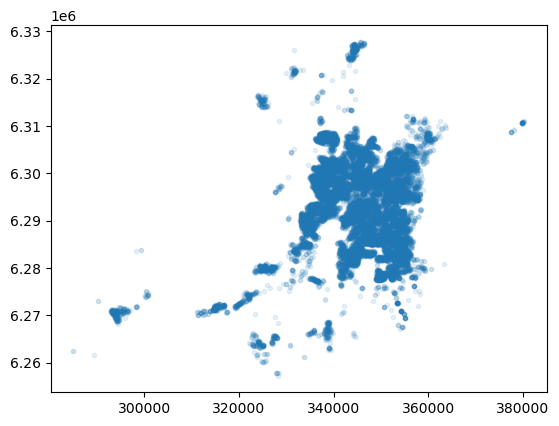

In [28]:
from aves.features.geo import to_point_geodataframe

homes = to_point_geodataframe(homes, "DirCoordX", "DirCoordY", crs="epsg:32719")

homes.plot(alpha=0.1, marker=".")

In [29]:
homes_zones = gpd.sjoin(homes.to_crs(zones.crs), zones, op="within")

In [30]:
poblacion_zonas = (
    homes_zones.join(
        people.groupby("Hogar")["FactorPersona"].sum().rename("peso"), on="Hogar"
    )
    .groupby("ZONA777")["peso"]
    .sum()
    .rename("poblacion")
)

poblacion_zonas

ZONA777
0      6970.29505
1      2748.79491
10     5469.45313
100    9167.22343
101    1767.35969
          ...    
94     2286.32646
95     8779.90963
96     8161.44684
97     4729.45588
99     6550.16780
Name: poblacion, Length: 782, dtype: float64

In [31]:
poblacion_zonas.sum()

6060380.4551099995

<Axes: >

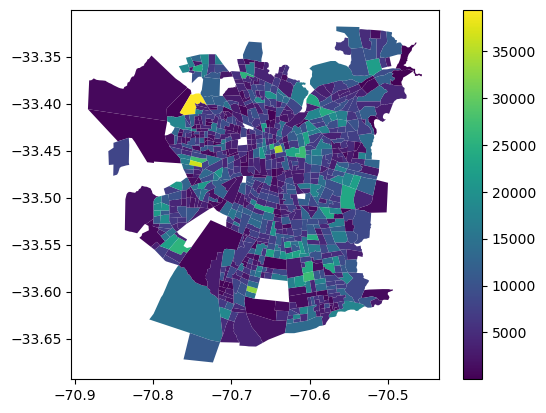

In [32]:
zones.join(poblacion_zonas, on="ZONA777").plot(column="poblacion", legend=True)

In [33]:
trip_counts_1

,hour,diseno777subida,comunasubida,n_viajes,tiempo
0,0,116,LO PRADO,2.1399,0
1,0,119,LO PRADO,3.2097,0
2,0,174,PROVIDENCIA,4.2798,0
3,0,183,PROVIDENCIA,7.4896,0
4,0,206,LAS CONDES,53.4960,0
...,...,...,...,...,...
18739,18,596,MAIPU,0.0000,0
18740,21,124,ESTACION CENTRAL,0.0000,0
18741,22,147,QUINTA NORMAL,0.0000,0
18742,22,516,PUENTE ALTO,0.0000,0


In [34]:
homes_zones.columns

Index(['Hogar', 'Sector', 'Zona', 'Comuna', 'DirCoordX', 'DirCoordY', 'Fecha',
       'DiaAsig', 'TipoDia', 'Temporada', 'NumPer', 'NumVeh', 'NumBicAdulto',
       'NumBicNino', 'Propiedad', 'MontoDiv', 'ImputadoDiv', 'MontoArr',
       'ImputadoArr', 'IngresoHogar', 'FactorHogar', 'geometry', 'index_right',
       'ID', 'AREA', 'ZONA777', 'Z_EOD', 'N_COM', 'COMUNA', 'NMACROZONA',
       'MACROZONA', 'N_ZONATS', 'ZONA_TS', 'EVTOTAL201', 'EVPMA2012',
       'EVPTA2012', 'NETAPAS201', 'TIEMPOVIAJ', 'VELOCIDADV'],
      dtype='object')

In [35]:
income_zones = (
    homes_zones.assign(_w=lambda x: x["FactorHogar"] * x["IngresoHogar"])
    .groupby("ZONA777")
    .agg(peso=("FactorHogar", "sum"), income=("_w", "sum"))
    .assign(
        mean_income=lambda x: (x["income"] * x["peso"] / x["peso"].sum()).astype(int)
    )
)
income_zones

,peso,income,mean_income
ZONA777,,,
0,3060.927543,3.009373e+09,4906682
1,935.044082,5.435042e+08,270703
10,2266.187163,1.729126e+09,2087282
100,2143.036296,1.427290e+09,1629298
101,1307.137100,7.216744e+08,502482
...,...,...,...
94,1068.498499,7.167693e+08,407954
95,2367.033181,1.153993e+09,1455011
96,1691.950242,1.067576e+09,962155


In [36]:
income_zones["mean_income"].describe().astype(int)

count          782
mean       3498189
std        7088448
min            119
25%         440843
50%        1418101
75%        3681604
max      105291886
Name: mean_income, dtype: int64

<Axes: ylabel='Frequency'>

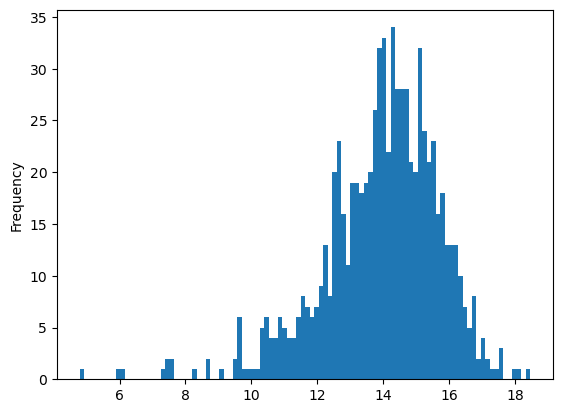

In [37]:
np.log(1 + income_zones["mean_income"]).plot(kind="hist", bins=100)

In [38]:
OSM_PATH = AVES_ROOT / "data" / "external" / "OSM"

osm_clipped_file = OSM_PATH / "clipped-scl-osm.pbf"

import pyrosm

osm = pyrosm.OSM(str(osm_clipped_file))

<Axes: >

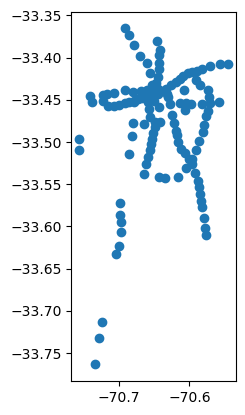

In [39]:
metro_stations = osm.get_data_by_custom_criteria(
    custom_filter={"public_transport": ["station"]},
    keep_ways=False,
    keep_relations=False,
    keep_nodes=True,
).pipe(lambda x: x[x["operator"].isin(["Metro S.A.", "Tren Central"])])

metro_stations.plot()

In [40]:
metro_stations["operator"].value_counts()

operator
Metro S.A.      113
Tren Central     13
Name: count, dtype: int64

<Axes: >

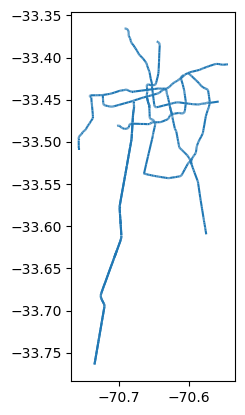

In [41]:
from aves.features.osm.pois import explode_tags

rail_network = (
    osm.get_data_by_custom_criteria(
        custom_filter=dict(railway=["subway", "usage", "rail"]),
        osm_keys_to_keep=["railway"],
        filter_type="keep",
    )
    .pipe(explode_tags)
    .pipe(lambda x: x[x["name"].fillna("").str.contains("Línea|Metro")])
)

rail_network.plot()

In [42]:
rail_network["name"]

2      Línea Central Sur
4      Línea Central Sur
6      Línea Central Sur
7                Línea 5
11     Línea Central Sur
             ...        
845              Línea 1
846              Línea 1
847             Línea 4A
848              Línea 1
849              Línea 1
Name: name, Length: 150, dtype: object

<Axes: >

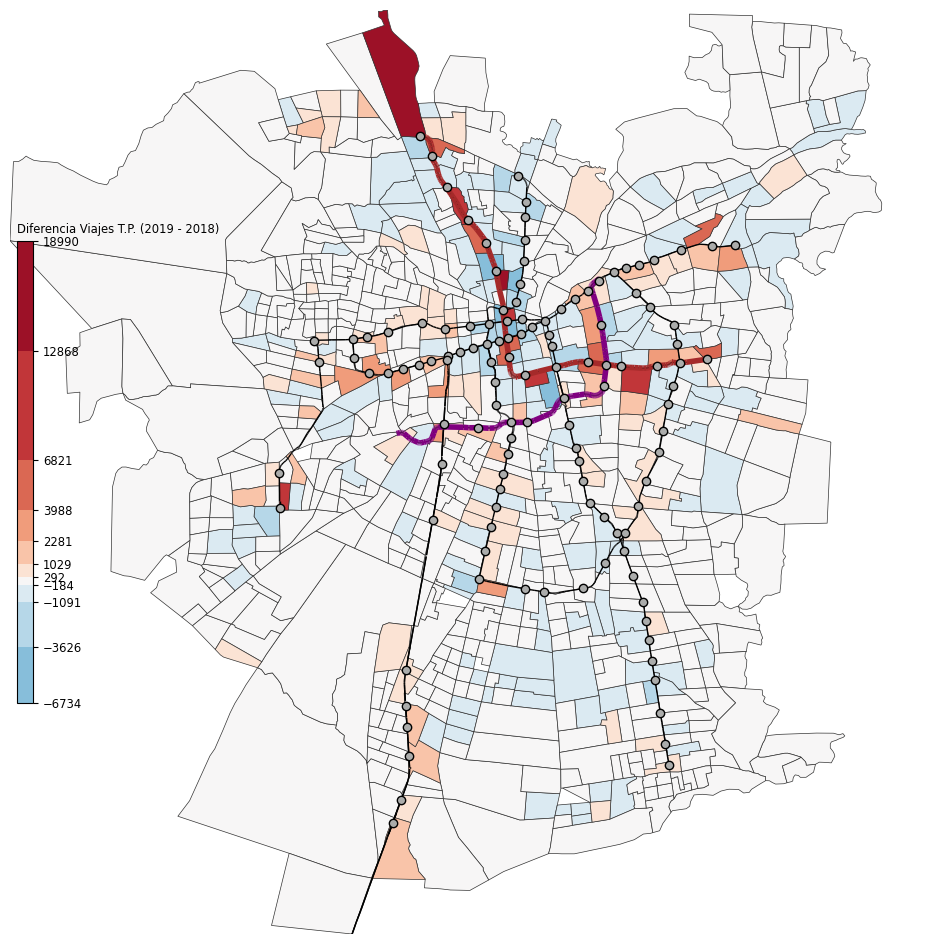

In [43]:
fig, ax = small_multiples_from_geodataframe(zones, 1, height=12)

choropleth_map(
    ax,
    zones.join(
        subidas_por_zona_2.sub(subidas_por_zona_1).rename("delta_viajes"), on="ZONA777"
    ),
    "delta_viajes",
    k=10,
    binning="fisher_jenks",
    linewidth=0.5,
    edgecolor="#333333",
    cbar_args=dict(
        label="Diferencia Viajes T.P. (2019 - 2018)",
        height="50%",
        width="2%",
        orientation="vertical",
        location="center left",
        label_size="small",
        bbox_to_anchor=(0.0, 0.0, 0.9, 1.0),
    ),
)

rail_network.plot(color="black", linewidth=1, ax=ax)
rail_network[rail_network.name == "Línea 3"].plot(ax=ax, color="brown", linewidth=4)
rail_network[rail_network.name == "Línea 6"].plot(ax=ax, color="purple", linewidth=4)
metro_stations.plot(color="#abacab", edgecolor="black", zorder=10, ax=ax)

<Axes: >

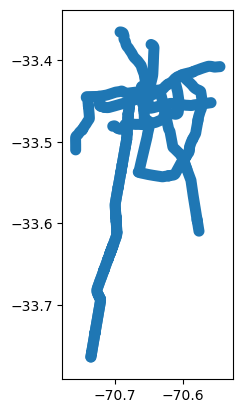

In [44]:
network_buffer_area = rail_network.assign(
    geometry=lambda x: x.to_crs("epsg:5361").buffer(750).to_crs("epsg:4326")
)
network_buffer_area.plot()

In [45]:
zone_metro_nearby = (
    gpd.sjoin(zones, network_buffer_area[["name", "geometry"]], predicate="intersects")
    .set_index("ZONA777")
    .pipe(lambda x: pd.get_dummies(x["name"]).astype(int))
    .reset_index()
    .groupby("ZONA777")
    .sum()
    .astype(bool)
    .astype(int)
)
zone_metro_nearby.columns = list(
    map(lambda x: x.replace("Línea ", "L").replace(" ", ""), zone_metro_nearby.columns)
)
zone_metro_nearby

,L1,L2,L3,L4,L4A,L5,L6,LCentralSur,Metrotren
ZONA777,,,,,,,,,
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
10,0,0,1,0,0,0,0,0,0
102,0,0,0,0,0,1,0,0,0
103,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
87,0,0,0,0,0,0,1,0,0
88,0,0,0,0,0,0,1,1,0
89,0,0,0,0,0,0,1,1,0


In [46]:
regression_data = (
    pd.concat(
        [
            trip_counts_1.join(zone_metro_nearby, on="diseno777subida", how="left")
            .assign(L3=0)
            .fillna(0),
            trip_counts_2.join(
                zone_metro_nearby, on="diseno777subida", how="left"
            ).fillna(0),
        ]
    )
    .reset_index(drop=True)
    .merge(treatment_zones, how="left")
    .pipe(lambda x: x[x["diseno777subida"] != "-"])
    .assign(scooters=lambda x: x["scooter_trips"] > 0)
    .join(poblacion_zonas, on="diseno777subida")
    .fillna(0)
    .pipe(
        lambda x: x[
            (x["n_viajes"] >= 10) & (x["poblacion"] > 0) & (x["dayofweek"] == 0)
        ]
    )
    .join(income_zones["mean_income"], on="diseno777subida")
    .drop_duplicates()
)

regression_data

,hour,diseno777subida,comunasubida,n_viajes,tiempo,L1,L2,L3,L4,L4A,L5,L6,LCentralSur,Metrotren,dayofweek,scooter_trips,scooters,poblacion,mean_income
4,0,206,LAS CONDES,53.4960,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,18109.61645,62904542
5,0,215,LAS CONDES,22.4688,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12275.71727,16131963
9,0,240,NUNOA,16.0490,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,14036.16643,14692309
12,0,275,SANTIAGO,41.7280,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,16232.97266,15361658
13,0,277,SANTIAGO,22.4685,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False,3123.31919,337635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39889,20,699,CERRILLOS,13.2562,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,758.90380,64897
39892,21,302,SANTIAGO,11.3610,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,1519.86808,14672
39903,22,482,LA FLORI,10.7373,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,5048.67818,995295
39904,22,785,LA PINTANA,13.3384,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,16956.51338,5019533


In [47]:
regression_data.describe()

,hour,n_viajes,tiempo,L1,L2,L3,L4,L4A,L5,L6,LCentralSur,Metrotren,dayofweek,scooter_trips,poblacion,mean_income
count,29119.000000,29119.000000,29119.00000,29119.000000,29119.000000,29119.000000,29119.000000,29119.000000,29119.000000,29119.000000,29119.000000,29119.000000,29119.0,29119.000000,29119.000000,2.911900e+04
mean,13.455579,282.962273,0.49569,0.111989,0.108967,0.060407,0.129675,0.054123,0.183660,0.086644,0.104640,0.022563,0.0,0.299495,8016.380113,3.774133e+06
std,5.191062,706.443889,0.49999,0.315358,0.311603,0.238244,0.335951,0.226264,0.387213,0.281318,0.306094,0.148507,0.0,5.135311,6210.527590,7.497672e+06
min,0.000000,10.002700,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,19.715230,1.190000e+02
25%,9.000000,38.817200,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3269.176590,5.147680e+05
50%,13.000000,92.507400,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,6619.586890,1.546281e+06
75%,18.000000,222.953000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,11052.822340,4.125853e+06
max,23.000000,15672.199700,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,201.000000,39398.207990,1.052919e+08


In [48]:
regression_data[regression_data["scooter_trips"] > 0].groupby("dayofweek")[
    "scooter_trips"
].sum()

dayofweek
0.0    8721.0
Name: scooter_trips, dtype: float64

In [49]:
import statsmodels.formula.api as sm

In [50]:
sm.ols(
    "np.log(n_viajes + 1) ~ 1 + tiempo + C(hour) + scooters + np.sqrt(poblacion)  + np.log(mean_income + 1) + L1 + L2 + L3 + L4 + L4A + L5 + L6 + LCentralSur + Metrotren",
    data=regression_data,
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(n_viajes + 1)   R-squared:                       0.298
Model:                              OLS   Adj. R-squared:                  0.297
Method:                   Least Squares   F-statistic:                     352.8
Date:                  Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                          12:23:59   Log-Likelihood:                -43545.
No. Observations:                 29119   AIC:                         8.716e+04
Df Residuals:                     29083   BIC:                         8.746e+04
Df Model:                            35                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2267      0.137      1.655      0.098      -0.042       0.495
C(hour)[T.1]               -0.7507      0.293     -2.558      0.011      -1.326      -0.176
C(hour)[T.2]               -0.8811      0.773     -1.141      0.254      -2.395       0.633
C(hour)[T.4]                0.4326      0.194      2.231      0.026       0.053       0.813
C(hour)[T.5]                1.5545      0.119     13.037      0.000       1.321       1.788
C(hour)[T.6]                2.6250      0.118     22.209      0.000       2.393       2.857
C(hour)[T.7]                3.0965      0.118     26.238      0.000       2.865       3.328
C(hour)[T.8]                2.9158      0.118     24.707      0.000       2.685       3.147
C(hour)[T.9]                2.5524      0.118     21.617      0.000       2.321       2.784
C(hour)[T.10]               2.3672      0.118     20.040      0.000       2.136       2.599
C(hour)[T.11]               2.2816      0.118     19.312      0.000       2.050       2.513
C(hour)[T.12]               2.2823      0.118     19.325      0.000       2.051       2.514
C(hour)[T.13]               2.3355      0.118     19.774      0.000       2.104       2.567
C(hour)[T.14]               2.2484      0.118     19.036      0.000       2.017       2.480
C(hour)[T.15]               2.2629      0.118     19.158      0.000       2.031       2.494
C(hour)[T.16]               2.3048      0.118     19.516      0.000       2.073       2.536
C(hour)[T.17]               2.5798      0.118     21.855      0.000       2.348       2.811
C(hour)[T.18]               2.6674      0.118     22.601      0.000       2.436       2.899
C(hour)[T.19]               2.2152      0.118     18.744      0.000       1.984       2.447
C(hour)[T.20]               1.9225      0.118     16.239      0.000       1.690       2.155
C(hour)[T.21]               1.6606      0.119     13.993      0.000       1.428       1.893
C(hour)[T.22]               1.4393      0.119     12.048      0.000       1.205       1.673
C(hour)[T.23]               0.7156      0.123      5.797      0.000       0.474       0.958
scooters[T.True]            0.2467      0.050      4.940      0.000       0.149       0.345
tiempo                     -0.0502      0.013     -3.762      0.000      -0.076      -0.024
np.sqrt(poblacion)          0.0021      0.000      6.274      0.000       0.001       0.003
np.log(mean_income + 1)     0.1202      0.007     17.896      0.000       0.107       0.133
L1                          0.9492      0.023     41.747      0.000       0.905       0.994
L2                          0.4977      0.021     23.282      0.000       0.456       0.540
L3                          0.3132      0.029     10.879      0.000       0.257       0.370
L4                       

<Axes: ylabel='Frequency'>

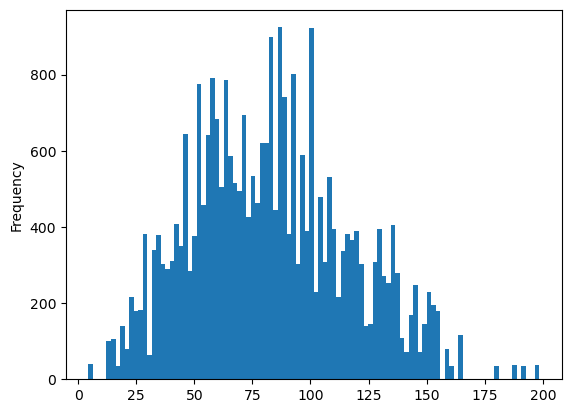

In [51]:
np.sqrt(regression_data["poblacion"]).plot(kind="hist", bins=100)

In [52]:
results = sm.poisson(
    "n_viajes ~ 1 + tiempo + C(hour) + scooters + np.sqrt(poblacion)  + np.log(mean_income + 1) + L1 + L2 + L3 + L4 + L4A + L5 + L6 + LCentralSur + Metrotren",
    data=regression_data.assign(treatment=lambda x: x["scooter_trips"] > 0),
).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 188.337356
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               n_viajes   No. Observations:                29119
Model:                        Poisson   Df Residuals:                    29083
Method:                           MLE   Df Model:                           35
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.4085
Time:                        12:24:00   Log-Likelihood:            -5.4842e+06
converged:                       True   LL-Null:                   -9.2711e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.1938      0.020     -9.746      0.000      -0.233      -0.155
C(hour)[T.1]               -0.9033      0.065    -13.914      0.000      -1.030      -0.776
C(hour)[T.2]               -0.9238      0.204     -4.526      0.000      -1.324      -0.524
C(hour)[T.4]                0.6420      0.040     15.857      0.000       0.563       0.721
C(hour)[T.5]                2.0306      0.020    103.657      0.000       1.992       2.069
C(hour)[T.6]                3.2928      0.019    170.260      0.000       3.255       3.331
C(hour)[T.7]                3.9320      0.019    203.650      0.000       3.894       3.970
C(hour)[T.8]                3.7945      0.019    196.482      0.000       3.757       3.832
C(hour)[T.9]                3.3491      0.019    173.243      0.000       3.311       3.387
C(hour)[T.10]               3.1628      0.019    163.505      0.000       3.125       3.201
C(hour)[T.11]               3.1433      0.019    162.488      0.000       3.105       3.181
C(hour)[T.12]               3.1967      0.019    165.282      0.000       3.159       3.235
C(hour)[T.13]               3.2984      0.019    170.595      0.000       3.260       3.336
C(hour)[T.14]               3.2261      0.019    166.818      0.000       3.188       3.264
C(hour)[T.15]               3.2295      0.019    166.994      0.000       3.192       3.267
C(hour)[T.16]               3.3383      0.019    172.683      0.000       3.300       3.376
C(hour)[T.17]               3.6748      0.019    190.249      0.000       3.637       3.713
C(hour)[T.18]               3.9607      0.019    205.159      0.000       3.923       3.999
C(hour)[T.19]               3.5457      0.019    183.503      0.000       3.508       3.584
C(hour)[T.20]               3.1333      0.019    161.931      0.000       3.095       3.171
C(hour)[T.21]               2.7986      0.019    144.376      0.000       2.761       2.837
C(hour)[T.22]               2.4661      0.019    126.827      0.000       2.428       2.504
C(hour)[T.23]               1.0423      0.020     51.365      0.000       1.003       1.082
scooters[T.True]            0.1540      0.002     78.662      0.000       0.150       0.158
tiempo                     -0.0864      0.001   -106.176      0.000      -0.088      -0.085
np.sqrt(poblacion)          0.0018   1.89e-05     97.477      0.000       0.002       0.002
np.log(mean_income + 1)     0.1232      0.000    287.430      0.000       0.122       0.124
L1                          1.3492      0.001   1458.222      0.000       1.347       1.351
L2                          0.5327      0.001    575.889      0.000       0.531       0.534
L3                          0.3579      0.001    282.281      0.000       0.355       0.360
L4                          0.2702      0.001    248.184      0.000       0.268       0.272
L4A                         0.3773      0.002    241.665      0.000       0.374       0.380
L5                   

In [53]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Poisson Marginal Effects      
=====================================
Dep. Variable:               n_viajes
Method:                          dydx
At:                           overall
===========================================================================================
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(hour)[T.1]             -255.5875     18.369    -13.914      0.000    -291.589    -219.586
C(hour)[T.2]             -261.4062     57.763     -4.526      0.000    -374.619    -148.193
C(hour)[T.4]              181.6486     11.456     15.856      0.000     159.195     204.102
C(hour)[T.5]              574.5909      5.547    103.590      0.000     563.719     585.462
C(hour)[T.6]              931.7405      5.482    169.961      0.000     920.996     942.485
C(hour)[T.7]             1112.6124      5.477    203.139      0.000    1101.877    1123.347
C(hour)[T.8]             1073.6986      5.477    196.023      0.000    1062.963    1084.434
C(hour)[T.9]              947.6675      5.480    172.928      0.000     936.927     958.408
C(hour)[T.10]             894.9638      5.482    163.240      0.000     884.218     905.709
C(hour)[T.11]             889.4483      5.483    162.229      0.000     878.702     900.194
C(hour)[T.12]             904.5463      5.482    165.008      0.000     893.802     915.291
C(hour)[T.13]             933.3183      5.481    170.295      0.000     922.576     944.060
C(hour)[T.14]             912.8691      5.481    166.537      0.000     902.126     923.613
C(hour)[T.15]             913.8153      5.481    166.712      0.000     903.072     924.559
C(hour)[T.16]             944.6195      5.480    172.371      0.000     933.879     955.360
C(hour)[T.17]            1039.8346      5.478    189.832      0.000    1029.099    1050.571
C(hour)[T.18]            1120.7303      5.477    204.637      0.000    1109.996    1131.464
C(hour)[T.19]            1003.3021      5.479    183.129      0.000     992.564    1014.040
C(hour)[T.20]             886.5949      5.484    161.674      0.000     875.847     897.343
C(hour)[T.21]             791.9060      5.492    144.194      0.000     781.142     802.670
C(hour)[T.22]             697.8023      5.507    126.703      0.000     687.008     708.597
C(hour)[T.23]             294.9328      5.743     51.357      0.000     283.677     306.189
scooters[T.True]           43.5862      0.554     78.633      0.000      42.500      44.673
tiempo                    -24.4618      0.231   -106.103      0.000     -24.914     -24.010
np.sqrt(poblacion)          0.5203      0.005     97.421      0.000       0.510       0.531
np.log(mean_income + 1)    34.8699      0.122    286.000      0.000      34.631      35.109
L1                        381.7686      0.294   1300.082      0.000     381.193     382.344
L2                        150.7253      0.267    564.637      0.000     150.202     151.249
L3                        101.2787      0.361    280.925      0.000     100.572     101.985
L4                         76.4448      0.309    247.261      0.000      75.839      77.051
L4A                       106.7525      0.443    240.813      0.000     105.884     107.621
L5                         59.0704      0.250    236.735      0.000      58.581      59.559
L6                        119.7105      0.295    406.318      0.000     119.133     120.288
LCentralSur                18.3186      0.384     47.686      0.000      17.566      19.072
Metrotren                -146.3023      1.186   -123.365      0.000    -148.627    -143.978
===========================================================================================
"""

In [54]:
results = sm.negativebinomial(
    "n_viajes ~ 1 + tiempo + C(hour) + scooters + np.sqrt(poblacion)  + np.log(mean_income + 1) + L1 + L2 + L3 + L4 + L4A + L5 + L6 + LCentralSur + Metrotren",
    data=regression_data,
).fit()
results.summary()

/home/egraells/miniconda3/envs/aves/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/home/egraells/miniconda3/envs/aves/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 6.223588
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:               n_viajes   No. Observations:                29119
Model:               NegativeBinomial   Df Residuals:                    29083
Method:                           MLE   Df Model:                           35
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.04901
Time:                        12:24:03   Log-Likelihood:            -1.8122e+05
converged:                      False   LL-Null:                   -1.9056e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.5410      0.115      4.713      0.000       0.316       0.766
C(hour)[T.1]               -0.8872      0.267     -3.328      0.001      -1.410      -0.365
C(hour)[T.2]               -0.9261      0.800     -1.158      0.247      -2.493       0.641
C(hour)[T.4]                0.7471      0.167      4.485      0.000       0.421       1.074
C(hour)[T.5]                2.4112      0.100     24.137      0.000       2.215       2.607
C(hour)[T.6]                3.6486      0.099     36.941      0.000       3.455       3.842
C(hour)[T.7]                4.1482      0.099     42.109      0.000       3.955       4.341
C(hour)[T.8]                3.9122      0.098     39.730      0.000       3.719       4.105
C(hour)[T.9]                3.4676      0.099     35.188      0.000       3.274       3.661
C(hour)[T.10]               3.2541      0.099     33.007      0.000       3.061       3.447
C(hour)[T.11]               3.1610      0.099     32.060      0.000       2.968       3.354
C(hour)[T.12]               3.1778      0.099     32.251      0.000       2.985       3.371
C(hour)[T.13]               3.2436      0.099     32.923      0.000       3.051       3.437
C(hour)[T.14]               3.1635      0.099     32.107      0.000       2.970       3.357
C(hour)[T.15]               3.1740      0.099     32.213      0.000       2.981       3.367
C(hour)[T.16]               3.2696      0.099     33.193      0.000       3.077       3.463
C(hour)[T.17]               3.5928      0.098     36.498      0.000       3.400       3.786
C(hour)[T.18]               3.7760      0.098     38.382      0.000       3.583       3.969
C(hour)[T.19]               3.3134      0.099     33.630      0.000       3.120       3.507
C(hour)[T.20]               2.9409      0.099     29.772      0.000       2.747       3.135
C(hour)[T.21]               2.6320      0.099     26.553      0.000       2.438       2.826
C(hour)[T.22]               2.3627      0.100     23.624      0.000       2.167       2.559
C(hour)[T.23]               1.3413      0.105     12.796      0.000       1.136       1.547
scooters[T.True]            0.3987      0.047      8.551      0.000       0.307       0.490
tiempo                     -0.0482      0.013     -3.819      0.000      -0.073      -0.023
np.sqrt(poblacion)          0.0028      0.000      8.999      0.000       0.002       0.003
np.log(mean_income + 1)     0.0523      0.006      8.896      0.000       0.041       0.064
L1                          1.4787      0.021     71.005      0.000       1.438       1.519
L2                          0.7064      0.020     34.849      0.000       0.667       0.746
L3                          0.3687      0.027     13.725      0.000       0.316       0.421
L4                          0.6234      0.019     33.470      0.000       0.587       0.660
L4A                         0.2111      0.028      7.664      0.000       0.157       0.265
L5                   

In [55]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
  NegativeBinomial Marginal Effects  
=====================================
Dep. Variable:               n_viajes
Method:                          dydx
At:                           overall
===========================================================================================
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(hour)[T.1]             -271.0529     81.551     -3.324      0.001    -430.889    -111.217
C(hour)[T.2]             -282.9278    244.361     -1.158      0.247    -761.867     196.011
C(hour)[T.4]              228.2582     51.057      4.471      0.000     128.189     328.327
C(hour)[T.5]              736.6669     32.112     22.940      0.000     673.728     799.606
C(hour)[T.6]             1114.7176     33.563     33.213      0.000    1048.936    1180.500
C(hour)[T.7]             1267.3270     34.491     36.744      0.000    1199.726    1334.928
C(hour)[T.8]             1195.2353     33.890     35.268      0.000    1128.813    1261.658
C(hour)[T.9]             1059.4003     33.070     32.035      0.000     994.585    1124.216
C(hour)[T.10]             994.1667     32.720     30.384      0.000     930.036    1058.297
C(hour)[T.11]             965.7335     32.554     29.665      0.000     901.928    1029.539
C(hour)[T.12]             970.8601     32.550     29.826      0.000     907.062    1034.658
C(hour)[T.13]             990.9706     32.630     30.370      0.000     927.017    1054.924
C(hour)[T.14]             966.5011     32.508     29.731      0.000     902.786    1030.216
C(hour)[T.15]             969.6991     32.523     29.816      0.000     905.955    1033.443
C(hour)[T.16]             998.9058     32.658     30.587      0.000     934.897    1062.914
C(hour)[T.17]            1097.6715     33.191     33.071      0.000    1032.618    1162.725
C(hour)[T.18]            1153.6317     33.469     34.469      0.000    1088.034    1219.230
C(hour)[T.19]            1012.2965     32.655     31.000      0.000     948.294    1076.299
C(hour)[T.20]             898.4892     32.193     27.910      0.000     835.392     961.586
C(hour)[T.21]             804.1058     31.904     25.204      0.000     741.574     866.637
C(hour)[T.22]             721.8424     31.867     22.651      0.000     659.384     784.301
C(hour)[T.23]             409.8021     32.509     12.606      0.000     346.086     473.518
scooters[T.True]          121.8214     14.431      8.442      0.000      93.537     150.106
tiempo                    -14.7130      3.857     -3.815      0.000     -22.273      -7.153
np.sqrt(poblacion)          0.8485      0.095      8.941      0.000       0.663       1.035
np.log(mean_income + 1)    15.9870      1.809      8.839      0.000      12.442      19.532
L1                        451.7577      9.747     46.349      0.000     432.654     470.861
L2                        215.8294      7.087     30.452      0.000     201.938     229.720
L3                        112.6376      8.419     13.379      0.000      96.137     129.138
L4                        190.4618      6.400     29.761      0.000     177.918     203.005
L4A                        64.5018      8.432      7.649      0.000      47.975      81.029
L5                        159.5669      5.641     28.285      0.000     148.510     170.624
L6                        135.8631      6.962     19.516      0.000     122.218     149.508
LCentralSur                -5.6537      7.213     -0.784      0.433     -19.791       8.483
Metrotren                 -90.8931     13.977     -6.503      0.000    -118.287     -63.499
===========================================================================================
"""